In [1]:
import camelot
import pandas as pd

### 1. Read the pages with tables in stream format

/var/folders/sf/pjcpsvqj67b_pqmm82g4y8bm0000gq/T/ipykernel_3140/4188447454.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='contour').show()


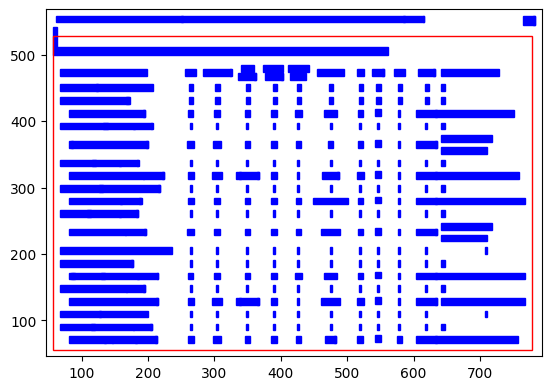

In [18]:
# Renamed the pdf to foo to make it easy (Dropping very long pdf name)
# tables start in page 11 of this pdf
# Using 'stream' as the table has colours as row seperators, a lot of white space and inconsistencies 
# in row height.

tables = camelot.read_pdf('foo.pdf', pages='11', flavor='stream', edge_tol=500, row_tol=10)

#display parsed area
camelot.plot(tables[0], kind='contour').show()

In [19]:
# The number of tables
tables

<TableList n=1>

In [20]:
# Export multiple tables as foo.csv : Don't need to do this
# tables.export('foo.csv', f='csv')

In [21]:
# Check out the shape of each table
tables[0]

<Table shape=(24, 12)>

In [22]:
# print the parsing report
tables[0].parsing_report

{'accuracy': 99.44, 'whitespace': 62.5, 'order': 1, 'page': 11}

In [23]:
# Convert each table to separate csv files : Don't need to do this
# tables[0].to_csv('foo.csv')

### 2. Assign table to dataframe : manual

In [24]:
df_11 = tables[0].df
df_11.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,T,abelle 1: Rote Liste und Gesamtartenliste der ...,,,,,,,,,,
1,,Wissenschaftlicher Name,BE,Bestand,vor,1990-,Trend,Habitat,D,BB,GS,K&R \nDeutscher Name
2,,,,,1990,2017,kurz,,,,,
3,,Hepialidae (Wurzelbohrer),,,,,,,,,,
4,,"Triodia HÜBNER, 1820",,,,,,,,,,


In [25]:
df_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       24 non-null     object
 1   1       24 non-null     object
 2   2       24 non-null     object
 3   3       24 non-null     object
 4   4       24 non-null     object
 5   5       24 non-null     object
 6   6       24 non-null     object
 7   7       24 non-null     object
 8   8       24 non-null     object
 9   9       24 non-null     object
 10  10      24 non-null     object
 11  11      24 non-null     object
dtypes: object(12)
memory usage: 2.4+ KB


# Data cleaning

In [26]:
# Find all rows with ex as the value for col index 3
ex_index = df_11[df_11.iloc[:,3] == "ex"].index

In [27]:
# Looking for rows that contain the Genus. This step dropped as the pattern to detect Genus is too 
# varied to have simple code. Genus added manually in Google sheets later.

# Find one row before the rows with ex as the value for col index 3
prev_index = df_11[df_11.iloc[:,3] == "ex"].index - 1

In [28]:
#filter the dataframe using the two indices : Discontinued
#df_11_new = df_11[(df_11.index.isin(ex_index))|(df_11.index.isin(prev_index))]

#filter the dataframe using the indices for extinct rows
df_11_new = df_11[df_11.index.isin(ex_index)]
df_11_new

,0,1,2,3,4,5,6,7,8,9,10,11
10,,"fusconebulosa (DEGEER, 1778)",0,ex,x 1973,–,,LKW,V,⬤,,00069 Adlerfarn-Wurzelbohrer
20,,"asella (DEN. & SCHIFF., 1775)",0,ex,x 1978,–,,LMW,V,⬤,,03912 \nKleiner Schneckenspinner


In [29]:
# The column to be dropped is defined by manually visually examining the dataframe
# Might be able to automate later. 

#drop the 0th column
df_11_new = df_11_new.drop([0], axis=1)
df_11_new.reset_index(inplace = True, drop = True)

In [30]:
df_11_new

,1,2,3,4,5,6,7,8,9,10,11
0,"fusconebulosa (DEGEER, 1778)",0,ex,x 1973,–,,LKW,V,⬤,,00069 Adlerfarn-Wurzelbohrer
1,"asella (DEN. & SCHIFF., 1775)",0,ex,x 1978,–,,LMW,V,⬤,,03912 \nKleiner Schneckenspinner


# Page 12

/var/folders/sf/pjcpsvqj67b_pqmm82g4y8bm0000gq/T/ipykernel_3140/3550344357.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='contour').show()


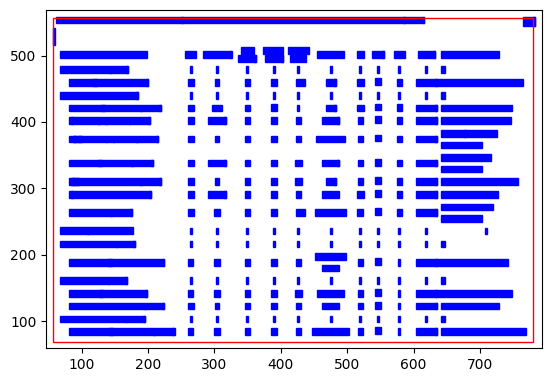

In [31]:
tables = camelot.read_pdf('foo.pdf', pages='12', flavor='stream', edge_tol=500, row_tol=10)
camelot.plot(tables[0], kind='contour').show()

In [32]:
tables

<TableList n=1>

In [33]:
tables[0]

<Table shape=(25, 11)>

In [34]:
tables[0].parsing_report

{'accuracy': 99.61, 'whitespace': 44.36, 'order': 1, 'page': 12}

In [35]:
df_12 = tables[0].df
df_12.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,,"Märkische Ent. Nachr., Sonderheft 7, Rote List...",,,,,,,,,12
1,Wissenschaftlicher Name,BE,Bestand,vor,1990-,Trend,Habitat,D,BB,GS,K&R \nDeutscher Name
2,,,,1990,2017,kurz,,,,,
3,"Adscita RETZIUS, 1783",,,,,,,,,,
4,"statices (LINNAEUS, 1758)",2,l,x,x,,TR,V,⬤,§,03956 Ampfer-Grünwidderchen


In [36]:
# Find all rows with ex as the value for col index 3
ex_index = df_12[df_12.iloc[:,2] == "ex"].index

In [37]:
# Find one row before the rows with ex as the value for col index 3
# prev_index = df_12[df_12.iloc[:,2] == "ex"].index - 1

In [39]:
#filter the dataframe using the two indices
df_12_new = df_12[df_12.index.isin(ex_index)]
df_12_new

,0,1,2,3,4,5,6,7,8,9,10
6,"purpuralis (BRUENNICH, 1763)",0,ex,x,–,,TR,V,⬤,§,03974 \nThymian-Widderchen


# Page 31

/var/folders/sf/pjcpsvqj67b_pqmm82g4y8bm0000gq/T/ipykernel_3140/3055487435.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='contour').show()


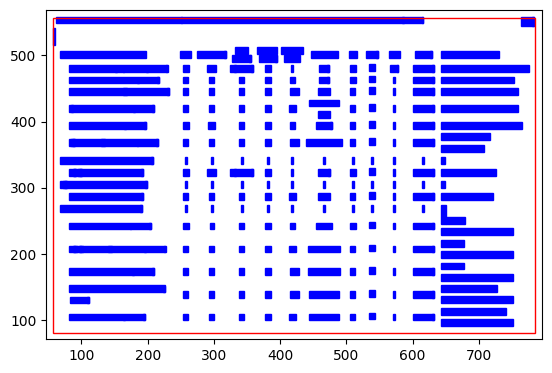

In [40]:
tables = camelot.read_pdf('foo.pdf', pages='31', flavor='stream', edge_tol=500, row_tol=10)
camelot.plot(tables[0], kind='contour').show()

In [41]:
tables

<TableList n=1>

In [42]:
tables[0]

<Table shape=(26, 13)>

In [43]:
tables[0].parsing_report

{'accuracy': 99.46, 'whitespace': 49.11, 'order': 1, 'page': 31}

In [44]:
df_31 = tables[0].df
df_31.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,,"Märkische Ent. Nachr., Sonderheft 7, Rote List...",,,,,,,,,,,31
1,,Wissenschaftlicher Name,BE,Bestand,vor,1990-,Trend,Habitat,D,BB,GS,K&R,Deutscher Name
2,,,,,1990,2017,kurz,,,,,,
3,,"decorata (DEN. & SCHIFF., 1775)",0,ex,x 1900,–,,TR,3,⬤,§§,08051,Sandthymian-Kleinspanner
4,,"rubiginata (HUFNAGEL, 1767)",*,v,x,x,?,TR,V,⬤,,08054,Violetter Kleinspanner


In [45]:
# Find all rows with ex as the value for col index 3
ex_index = df_31[df_31.iloc[:,3] == "ex"].index
# Find one row before the rows with ex as the value for col index 3
#prev_index = df_31[df_31.iloc[:,3] == "ex"].index - 1

#filter the dataframe using the ex index
df_31_new = df_31[(df_31.index.isin(ex_index))]#|(df_31.index.isin(prev_index))]
df_31_new

,0,1,2,3,4,5,6,7,8,9,10,11,12
3,,"decorata (DEN. & SCHIFF., 1775)",0,ex,x 1900,–,,TR,3,⬤,§§,08051,Sandthymian-Kleinspanner
12,,"v\ni\nb\ni\ncaria (CLERCK, 1759)",0,ex,x 1986,–,,CH,V,⬤,,08205,Rotbandspanner


# Looping through first 10 pages from pg 11 onwards

In [46]:
# testing the entire process for just one page 

#read the page
tables = camelot.read_pdf('foo.pdf', pages= '11', flavor='stream', edge_tol=500, row_tol=10)
#assign the first table to a dataframe
df = tables[0].df
#check for rows with "ex" column 2 and get a list of indices for those rows
if len(df.columns) >= 10:
    ex_index = df[(df.iloc[:,2] == "ex") | (df.iloc[:,3] == "ex") ].index
    # if the index is in the ex_index add it to/ keep in the the dataframe
    if len(df.columns) == 12:
        df = df.drop([0], axis=1)
    df = df[(df.index.isin(ex_index))]
    print(df.shape)
    print ("Done")

(2, 11)
Done
Complete


In [135]:
df.head(10)

,1,2,3,4,5,6,7,8,9,10,11
10,"fusconebulosa (DEGEER, 1778)",0,ex,x 1973,–,,LKW,V,⬤,,00069 Adlerfarn-Wurzelbohrer
20,"asella (DEN. & SCHIFF., 1775)",0,ex,x 1978,–,,LMW,V,⬤,,03912 \nKleiner Schneckenspinner


In [136]:
len(df.columns)

11

In [137]:
# Trying to solve the column name dillemma due to dropping columns
df.rename(columns={1: 0,
                   2: 1,
                   3: 2,
                   4: 3,
                   5: 4,
                   6: 5,
                   7: 6,
                   8: 7,
                   9: 8,
                   10: 9,
                   11: 10,
                  }, inplace = True)

In [138]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
10,"fusconebulosa (DEGEER, 1778)",0,ex,x 1973,–,,LKW,V,⬤,,00069 Adlerfarn-Wurzelbohrer
20,"asella (DEN. & SCHIFF., 1775)",0,ex,x 1978,–,,LMW,V,⬤,,03912 \nKleiner Schneckenspinner


# Updated Process

## 1. Create empty dataframe with proper column names

In [ ]:
# This is where data will be added after cleaning. The final dataframe for export

In [47]:
df = pd.DataFrame(columns = [
    "Species",
    "BE", 
    "Bestand", 
    "Vor_1990", 
    "1990_2017",
    "Trend_kurz",
    "Habitat",
    "D",
    "BB",
    "GS",
    "Common_name"
])
df

,Species,BE,Bestand,Vor_1990,1990_2017,Trend_kurz,Habitat,D,BB,GS,Common_name


In [48]:
df.shape

(0, 11)

## 2. Setup mechanism to store accuracy report : QA step

In [50]:
accuracy = []

## 3. Dictionary of dataframes on the go

In [ ]:
# Dictionary to collect dataframes created from each table
d = {}

## 4. Adding the list of pages to be parsed

In [ ]:
pages = []
i = 11
while i < 89:
    pages.append(i)
    i = i + 1
print(pages)

## 5. Parsing through the pages

In [ ]:
for i in pages:
    # print page number
    print (i)
    # create dataframe with page number
    d[i] = pd.DataFrame()
    #read the page
    tables = camelot.read_pdf('foo.pdf', pages= str(i), flavor='stream', edge_tol=1000, row_tol=10)
    # add the accuracy report
    accuracy.append(tables[0].parsing_report)
    # assign the first table to a dataframe
    d[i] = tables[0].df
    # check for rows with "ex" column 2 and get a list of indices for those rows
    ex_index = d[i][(d[i].iloc[:,2] == "ex") | (d[i].iloc[:,3] == "ex") ].index
    # only keep the rows if the index is in the ex_index
    d[i] = d[i][(d[i].index.isin(ex_index))]
    # print the shape of the dataframe 
    # (check whether there are enough columns, if not change page reading parameters
    print(d[i].shape)
# Print Done once all pages are parsed
print ("Done")

In [ ]:
# Check accuracy reports for the process
accuracy

# Data cleanup steps

In [ ]:
# Check whether all dataframes are of the same size
for key in d:
    print(key)
    print(d[key].shape)

In [ ]:
# Removing empty dataframes
# del d[64]
# del d[74]

In [ ]:
# Creates a sorted dictionary (sorted by key)
from collections import OrderedDict
d2 = OrderedDict(sorted(d.items()))

In [ ]:
# Check whether the dictionary is sorted
for key in d2:
    print(key)

In [ ]:
# Rename all the dataframes in the sorted dictionary
for key in d2:
    print(key)
    d2[key].columns = [ "Species",
    "BE", 
    "Bestand", 
    "Vor_1990", 
    "1990_2017",
    "Trend_kurz",
    "Habitat",
    "D",
    "BB",
    "GS",
    "Common_name"]
print("Rename completed for concat")

In [ ]:
# Concatanate all the non-empty dataframes in the sorted dictionary into the empty df
for key in d2:
    df = pd.concat([df, d2[key]], axis = 0)
df

In [ ]:
# export the dataframe as CSV
df.to_csv('df.csv')